# Regularization & Dropout

dropout_layer = nn.Dropout(p=0.2)   
input = torch.randn(1,10)   
output = dropout_layer(input)   
 
 
1) Vad tror du koden gör? 
    - Instantierar en dropout-layer med en dropout-sannolikhet på 0.2.
    - Skapar en input tensor med slumpmässiga värden.
    - Använder dropout-layern för att slumpmässigt sätta vissa värden till 0.
 
2) Vad får du för output om du kör koden ett par gånger? Does it make sense?

In [7]:
import torch.nn as nn
import torch

def dropout_layer(p):   
    dropout_layer = nn.Dropout(p=p)   
    input = torch.randn(1,10)   
    output = dropout_layer(input)
    print(output)
    print()

dropout_layer(0.2)


tensor([[-0.4683,  0.0000, -0.0930, -0.3898,  0.0000,  1.4398,  0.2452, -0.1876,
          1.3543,  0.0000]])



In [9]:
for i in range(3):
    dropout_layer(0.2)

tensor([[-0.0982, -1.1914,  0.1600, -1.4243, -0.0000, -1.0856,  0.4940, -1.3026,
         -0.2855, -1.4615]])

tensor([[-0.5208,  1.5293,  0.0000,  0.0000, -0.0744,  0.0000, -0.6586,  0.0000,
         -0.1313, -0.9790]])

tensor([[ 1.3673,  3.0584, -0.1385, -0.0000,  0.4944,  2.2025,  0.0121,  0.5890,
         -0.8027, -0.3626]])



3) Anta att vi ändrar batch_size till 3. Hur ändrar vi i koden ovan? 
 
4) Ändra batch_size till 3, och kör koden ett par gånger. Vad får du för output? Does it 
make sense? 

In [10]:
# Anta att vi ändrar batch_size till 3. Hur ändrar vi i koden ovan? 

def dropout_layer(p):   
    dropout_layer = nn.Dropout(p=p)   
    input = torch.randn(3,10)    
    output = dropout_layer(input)
    print(output)
    print()

for i in range(3):
    dropout_layer(0.2)

tensor([[ 0.0000e+00, -8.3208e-02, -2.4334e-01, -3.1955e-01, -1.0970e+00,
          2.5186e+00, -7.0810e-01,  1.2329e-01,  1.6666e+00, -1.3047e+00],
        [-1.7077e-01,  1.0022e+00,  1.1543e+00,  8.8854e-04, -1.6718e+00,
          2.0395e+00, -3.8314e-01, -0.0000e+00, -0.0000e+00, -1.3076e+00],
        [ 1.7936e+00, -5.2125e-01, -1.8403e+00, -0.0000e+00, -0.0000e+00,
         -4.4352e-01, -0.0000e+00, -1.8251e+00,  3.1619e-01, -0.0000e+00]])

tensor([[-1.0987, -0.0000,  0.5303, -0.0000, -0.3355, -1.2541,  2.6457, -1.4698,
         -0.0000,  0.3010],
        [ 0.2814, -1.0495, -0.2086,  0.0000,  0.0000,  0.9369, -0.0000,  0.5031,
         -0.1209, -1.2793],
        [ 2.3910, -0.6372, -0.7304,  1.0292,  0.0000,  0.0000, -0.0000,  0.6349,
          0.8173, -0.0000]])

tensor([[-0.9152,  1.3163, -0.4748, -0.9594,  0.0000, -0.5086,  0.0000,  0.0000,
          2.2922,  0.0000],
        [-1.2689, -1.7809,  0.2919, -0.8319,  0.4700,  0.0626, -0.0000,  2.0722,
          0.3753,  0.9772],
    

Välj nu ett enkelt träningsdataset som du jobbat med tidigare, och testa nu att träna ett Neuralt Nätverk med regularisering och/eller dropout layers.
Försök att träna större och större nätverk och (förhoppningsvis) overfit på din data. Lägg därtil på
1.  Regularisering
2.  Dropout (olika lager, olika rates, testa!)
3.  Både Regularisering och Dropout

In [1]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

df = pd.read_csv(url, names=columns, sep=',\s*', engine='python', na_values="NA")

######## Data Preparation ########
# rename ? labels to Unknown in columns: workclass, occupation, native-country
df.replace('?', 'Unknown', inplace=True)

# drop fnlwgt
df.drop(columns=['fnlwgt'], inplace=True)

# onehot encode categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.to_list()
df = pd.get_dummies(df, columns=categorical_features, dtype=int, drop_first=True)

######## Data Split ########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['income_>50K']), 
                                                    df['income_>50K'], 
                                                    test_size=0.1, 
                                                    random_state=42)

######## Data Normalization ########
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

######## Deeplearning Preparations ########
# Convert to Tensor
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Available device: {device}")
print("CUDA device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

X_train = torch.from_numpy(X_train.values).type(torch.FloatTensor).to(device)
X_test = torch.from_numpy(X_test.values).type(torch.FloatTensor).to(device)
y_train = torch.from_numpy(y_train.values).type(torch.FloatTensor).to(device).reshape([-1, 1])
y_test = torch.from_numpy(y_test.values).type(torch.FloatTensor).to(device).reshape([-1, 1])

# Create training and test sets
training_set = list(zip(X_train, y_train))
test_set = list(zip(X_test, y_test))

Available device: cuda
CUDA device name: NVIDIA GeForce RTX 2070 SUPER


In [12]:
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings
from torch.optim.lr_scheduler import StepLR
import seaborn as sns
warnings.filterwarnings('ignore')

class ModelTrainer:
    def __init__(self, input_size, device, batch_size=16, learning_rate=0.001, verbose=True):
        self.input_size = input_size
        self.device = device
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.verbose = verbose  # control print statements
        
        # initialize model, loss function
        self.model = Net(input_size).to(device)
        self.loss_function = torch.nn.BCELoss()
        self.optimizer = SGD(self.model.parameters(), lr=learning_rate)
        
        # initialize storage for epoch averages of losses
        self.train_losses = []
        self.test_losses = []
        self.current_epoch = 0

        # initialize scheduler as None
        self.scheduler = None

    def set_learning_rate(self, new_lr):
        """Update learning rate of the optimizer"""
        self.learning_rate = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr
        
    def setup_data_loaders(self, training_set, test_set):
        self.train_dataloader = DataLoader(training_set,
                                         batch_size=self.batch_size,
                                         shuffle=True)
        self.test_dataloader = DataLoader(test_set,
                                        batch_size=len(test_set),
                                        shuffle=False)
    
    def train_epoch(self, epoch):
        self.model.train()
        batch_losses = []
        
        # verbose print formatting: calculate field widths based on total values
        total_samples = len(self.train_dataloader.dataset)
        epoch_width = len(str(self.current_epoch + 1))
        sample_width = len(str(total_samples))
        
        for batch_idx, (data, target) in enumerate(self.train_dataloader):
            data, target = data.to(self.device), target.to(self.device)
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.loss_function(output, target)
            loss.backward()
            self.optimizer.step()
            
            batch_losses.append(loss.item())
            if self.verbose and batch_idx % 10 == 0:
                samples_processed = batch_idx * len(data)
                percentage = 100. * batch_idx / len(self.train_dataloader)
                print(f'train epoch: {epoch:{epoch_width}} '
                    f'[{samples_processed:>{sample_width}}/{total_samples} ({percentage:.0f}%)]\t'
                    f'loss: {loss.item():.6f}')
        
        epoch_average_loss = np.average(batch_losses)
        self.train_losses.append(epoch_average_loss)
        return epoch_average_loss
    
    def test(self, epoch):
        self.model.eval()
        with torch.no_grad():
            data, target = next(iter(self.test_dataloader))
            data, target = data.to(self.device), target.to(self.device)
            output = self.model(data)
            loss = self.loss_function(output, target)
            test_loss = loss.item()

            # calculate accuracy
            predicted = (output > 0.5).float()  # threshold at 0.5 for binary classification
            correct = (predicted == target).sum().item()
            total = target.size(0)
            
            self.test_losses.append(test_loss)  # save loss for this epoch

            train_loss = self.train_losses[-1]  # get latest epoch average training loss

            if self.verbose:
                print(f'\nEpoch {epoch}:')
                print(f'Training loss: {train_loss:.4f}')
                print(f'Test loss: {test_loss:.4f}')
                print(f'Accuracy: {correct}/{total} ({100. * correct / total:.0f}%)\n')
            else:
                print(f'[epoch {epoch}] train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, '
                    f'accuracy: {correct}/{total} ({100. * correct / total:.0f}%)')
            return test_loss
    
    def train(self, training_set, test_set, num_epochs=5, gamma=None):
        # setup data loaders
        self.setup_data_loaders(training_set, test_set)

        # initialize scheduler if gamma is provided
        if gamma is not None:
            self.scheduler = StepLR(self.optimizer, step_size=1, gamma=gamma)

        start_epoch = self.current_epoch + 1
        end_epoch = start_epoch + num_epochs
        
        # training loop
        for epoch in range(start_epoch, end_epoch):
            train_loss = self.train_epoch(epoch)
            test_loss = self.test(epoch)
            self.current_epoch = epoch

            # step the scheduler if it's initialized
            if self.scheduler is not None:
                self.scheduler.step()
        
        # plot results
        self.plot_losses()
        
        return self.model
    
    def plot_losses(self, start_epoch=None, end_epoch=None):
        plt.figure(figsize=(10, 6))
        
        # handle negative start_epoch (counting from end)
        if start_epoch and start_epoch < 0:
            start_epoch = self.current_epoch + start_epoch + 1
        
        # default to all epochs if no range specified
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        # adjust for zero-based index
        start_index = start_epoch - 1
        end_index = end_epoch

        epochs = range(start_epoch, end_epoch + 1)
        train_losses = self.train_losses[start_index:end_index]
        test_losses = self.test_losses[start_index:end_index]

        plt.plot(epochs, train_losses, label='train loss')
        plt.plot(epochs, test_losses, label='test loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('training and test losses')

        plt.suptitle(f'learning rate: {self.learning_rate}, '
                    f'batch size: {self.batch_size}, '
                    f'epochs: {end_epoch - start_epoch + 1}', fontsize=10, y=0.95)

        plt.legend()

        # set y-axis to standard decimal notation
        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.4f}'))
        
        # show at most 20 ticks on x-axis
        max_ticks = 20
        step = max(len(epochs) // max_ticks, 1)
        plt.xticks(list(epochs)[::step])
        
        plt.grid(False)
        sns.despine()
        plt.show()

[epoch 1] train loss: 0.6532, test loss: 0.5891, accuracy: 2456/3257 (75%)
[epoch 2] train loss: 0.5485, test loss: 0.5252, accuracy: 2456/3257 (75%)
[epoch 3] train loss: 0.4988, test loss: 0.4847, accuracy: 2456/3257 (75%)
[epoch 4] train loss: 0.4603, test loss: 0.4464, accuracy: 2460/3257 (76%)
[epoch 5] train loss: 0.4244, test loss: 0.4116, accuracy: 2484/3257 (76%)
[epoch 6] train loss: 0.3943, test loss: 0.3839, accuracy: 2601/3257 (80%)
[epoch 7] train loss: 0.3725, test loss: 0.3648, accuracy: 2738/3257 (84%)
[epoch 8] train loss: 0.3582, test loss: 0.3525, accuracy: 2761/3257 (85%)
[epoch 9] train loss: 0.3490, test loss: 0.3444, accuracy: 2772/3257 (85%)
[epoch 10] train loss: 0.3429, test loss: 0.3391, accuracy: 2774/3257 (85%)


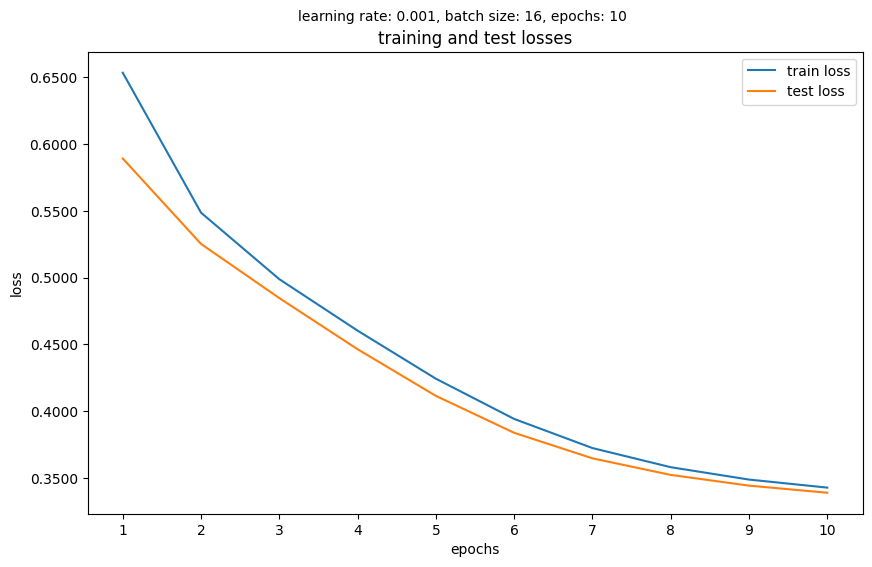

In [14]:
# Simple Pyramid structure, gradually decrease width

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=10
) 